In [ ]:
import pandas as pd
import numpy as np
arrays=[['학교1','학교1','학교1','학교1','학교2','학교2','학교3','학교3'],
        ['1반','2반','1반','2반','1반','2반','1반','2반']]
index=pd.MultiIndex.from_arrays(arrays,names=['first','second'])
df=pd.DataFrame({'합격':[1,1,1,1,2,2,3,3],
                 '등수':np.arange(8)},
                index=arrays)
print(df)

        합격  등수
학교1 1반   1   0
    2반   1   1
    1반   1   2
    2반   1   3
학교2 1반   2   4
    2반   2   5
학교3 1반   3   6
    2반   3   7


In [ ]:
grouped=df.groupby(level=0) #0,1
print(grouped)
grouped.sum()

,합격,등수
학교1,4,6
학교2,4,9
학교3,6,13


In [ ]:
df.groupby(level=1).sum()

,합격,등수
1반,7,12
2반,7,16


In [ ]:
df.groupby(level=[0,1]).sum()

합격  등수
학교1 1반   2   2
    2반   2   4
학교2 1반   2   4
    2반   2   5
학교3 1반   3   6
    2반   3   7

In [ ]:
# range(리스트), arange(ndarray), date_range(시계열 데이터 Datetimeindex)
index=pd.date_range('10/1/1999',periods=1100)
ts=pd.Series(np.random.normal(0.5,2,1100),index)
# print(ts.index)
print(ts.shape)
print(ts.head())
# 이동평균법
ts=ts.rolling(window=100,min_periods=100).mean().dropna()
print('구분용')
print(ts.head())
print(ts.shape)

# 이동평균법
# ts=ts.rolling(window=10,min_periods=10).mean().dropna()
# print(ts.shape)
ts.tail()

(1100,)
1999-10-01    0.637045
1999-10-02   -1.385494
1999-10-03    2.770390
1999-10-04   -0.734743
1999-10-05    2.609344
Freq: D, dtype: float64
구분용
2000-01-08    0.539266
2000-01-09    0.530021
2000-01-10    0.564677
2000-01-11    0.541736
2000-01-12    0.524240
Freq: D, dtype: float64
(1001,)


2002-09-30    0.528844
2002-10-01    0.545540
2002-10-02    0.531270
2002-10-03    0.517540
2002-10-04    0.552340
Freq: D, dtype: float64

In [ ]:
# 데이터를 Z 점수로 변형
transformed=(ts.groupby(lambda x:x.year).transform(lambda x:(x-x.mean())/x.std()))

print(transformed)

2000-01-08    1.067120
2000-01-09    1.005041
2000-01-10    1.237746
2000-01-11    1.083703
2000-01-12    0.966226
                ...   
2002-09-30    1.502580
2002-10-01    1.665043
2002-10-02    1.526188
2002-10-03    1.392587
2002-10-04    1.731213
Freq: D, Length: 1001, dtype: float64


In [ ]:
grouped=ts.groupby(lambda x:x.year)

In [ ]:
# 연별 평균
grouped.mean()

2000    0.380342
2001    0.484155
2002    0.374428
dtype: float64

In [ ]:
# Z 점수의 평균
grouped_trans=transformed.groupby(lambda x:x.year)
grouped_trans.mean()

2000    8.751897e-17
2001    7.999689e-16
2002    1.683371e-17
dtype: float64

<Axes: >

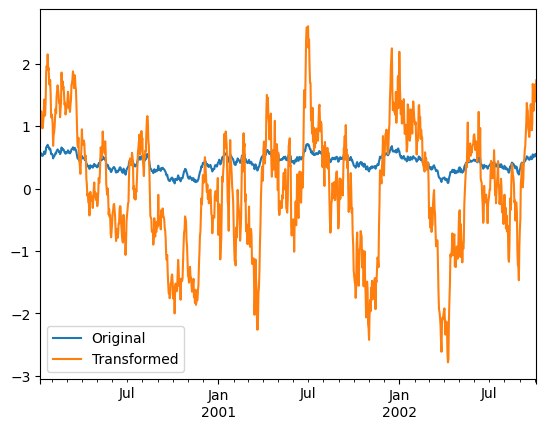

In [ ]:
compare=pd.DataFrame({'Original':ts,'Transformed':transformed})
compare.plot()

In [ ]:
sf=pd.Series([1,1,2,3,3,3])
sf.groupby(sf).filter(lambda x:x.sum()>2)

3    3
4    3
5    3
dtype: int64

In [ ]:
df=pd.DataFrame({'key':['A','B','C','A','B','C'],
                 'data':range(6)},columns=['key','data'])
print(df)

  key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5


In [ ]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [ ]:
import seaborn as sns
planets=sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.head()
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [ ]:
planets.groupby('method').sum()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,1.262360e+03,0.00000,35.75,4023
Eclipse Timing Variations,15,4.276480e+04,10.25000,1261.44,18090
Imaging,50,1.418973e+06,0.00000,2166.91,76347
Microlensing,27,2.207500e+04,0.00000,41440.00,46225
Orbital Brightness Modulation,5,2.127920e+00,0.00000,2360.00,6035
Pulsar Timing,11,3.671511e+04,0.00000,1200.00,9992
Pulsation Timing Variations,1,1.170000e+03,0.00000,0.00,2007
Radial Velocity,952,4.553151e+05,1341.65638,27348.11,1110158
Transit,776,8.377523e+03,1.47000,134242.77,798461


In [ ]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [ ]:
# 문제
# 각 그룹의 개수를 확인해 보시오 
planets.groupby('method')['method'].count()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           38
Microlensing                      23
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          4
Name: method, dtype: int64

In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
for (method,group) in planets.groupby('method'):
  print("{0:30s} shape={1}".format(method,group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [ ]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [ ]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [ ]:
# 문제
# 반별 최소값,중위수,최대값
print(df.groupby('key').min())
print(df.groupby('key').median())
print(df.groupby('key').max())

rng=np.random.RandomState(0)
df=pd.DataFrame({'key':['1반','2반','3반','1반','2반','3반'],
                 '국어':rng.randint(80,100,6),
                 '수학':rng.randint(90,100,6)},
                columns=['key','국어','수학'])
print(df)

     data
key      
A       0
B       1
C       2
     data
key      
A     1.5
B     2.5
C     3.5
     data
key      
A       3
B       4
C       5
  key  국어  수학
0  1반  92  99
1  2반  95  93
2  3반  80  95
3  1반  83  92
4  2반  83  94
5  3반  87  97


In [ ]:
df.groupby('key').aggregate(['min',np.median,max]) # 함수의 이름을 전달

국어             수학           
    min median max min median max
key                              
1반   83   87.5  92  92   95.5  99
2반   83   89.0  95  93   93.5  94
3반   80   83.5  87  95   96.0  97

In [ ]:
df.groupby('key').aggregate({'국어':'min',
                             '수학':'max'})

,국어,수학
key,,
1반,83,99
2반,83,94
3반,80,97


In [ ]:
# 문제
# 수학의 표준편차가 1보다 큰 데이터만 출력하시오

def filter_func(x):
  return x['수학'].std()>1

df.groupby('key').filter(filter_func)
# df.groupby(df).filter(lambda x:x['수학].std()>1)

,key,국어,수학
0,1반,92,99
2,3반,80,95
3,1반,83,92
5,3반,87,97


In [ ]:
df=pd.DataFrame({'key1':['영업부','영업부','관리부','관리부','영업부'],
                 'key2':['남','여','남','여','남'],
                 'data1':np.random.randn(5),
                 'data2':np.random.randn(5)})
print(df)

  key1 key2     data1     data2
0  영업부    남 -0.806306 -1.150985
1  영업부    여  0.854886 -0.488053
2  관리부    남  0.098494 -0.929178
3  관리부    여  2.319104  0.140047
4  영업부    남  0.075679 -1.148468


In [ ]:
# 데이터에 열이름을 붙여서 표현
print(df.stack())

0  key1          영업부
   key2            남
   data1   -0.806306
   data2   -1.150985
1  key1          영업부
   key2            여
   data1    0.854886
   data2   -0.488053
2  key1          관리부
   key2            남
   data1    0.098494
   data2   -0.929178
3  key1          관리부
   key2            여
   data1    2.319104
   data2    0.140047
4  key1          영업부
   key2            남
   data1    0.075679
   data2   -1.148468
dtype: object


In [ ]:
print(df.melt()) # 키를 중심하고 정렬해서 보여줌

   variable     value
0      key1       영업부
1      key1       영업부
2      key1       관리부
3      key1       관리부
4      key1       영업부
5      key2         남
6      key2         여
7      key2         남
8      key2         여
9      key2         남
10    data1 -0.806306
11    data1  0.854886
12    data1  0.098494
13    data1  2.319104
14    data1  0.075679
15    data2 -1.150985
16    data2 -0.488053
17    data2 -0.929178
18    data2  0.140047
19    data2 -1.148468


In [ ]:
# 문제
# 부서별 평균출력

print(df.groupby(df['key1']).mean())

         data1     data2
key1                    
관리부   1.208799 -0.394565
영업부   0.041420 -0.929168


<ipython-input-120-44436770bb39>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(df['key1']).mean())


In [ ]:
# 성별합계
print(df.groupby('key2').sum())

         data1     data2
key2                    
남    -0.632133 -3.228630
여     3.173990 -0.348005


<ipython-input-121-0fbeab80650e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('key2').sum())


In [ ]:
# 부서별 성별 합계
print(df.groupby(['key1','key2']).sum()['data1'])

print(df['data1'].groupby(['key1','key2']).sum())

key1  key2
관리부   남       0.098494
      여       2.319104
영업부   남      -0.730627
      여       0.854886
Name: data1, dtype: float64


KeyError: ignored

In [ ]:
result=df['data1'].groupby([df['key1'],df['key2']]).mean()

In [ ]:
# 계층적 인덱스를 행렬로 변환
result2=result.unstack()

In [ ]:
result2.stack()

key1  key2
관리부   남       0.098494
      여       2.319104
영업부   남      -0.365314
      여       0.854886
dtype: float64

In [ ]:
states=np.array(['Ohio','Califonia','Califonia','Ohio','Ohio'])
years=np.array([2005,2005,2006,2005,2006])
print(df['data1'].groupby([states,years]).mean())

Califonia  2005    0.854886
           2006    0.098494
Ohio       2005    0.756399
           2006    0.075679
Name: data1, dtype: float64


<ipython-input-130-cb13eb4069ed>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights.groupby(flights['year']).sum().plot.bar()


<Axes: xlabel='year'>

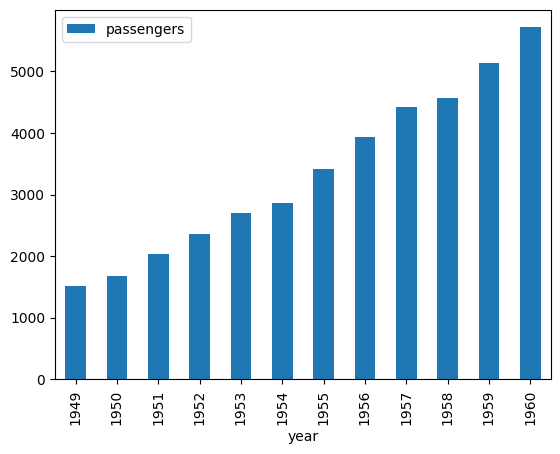

In [ ]:
flights=sns.load_dataset("flights")
flights.head()
flights.groupby(flights['year']).sum().plot.bar()

<Axes: xlabel='month'>

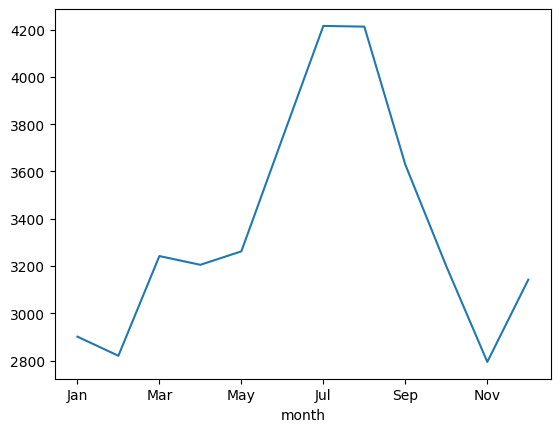

In [ ]:
flights['passengers'].groupby(flights['month']).sum().plot()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/daejeon_1/flights.csv')
print(df)

       MONTH  DAY  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  \
0          1    1        4      WN     LAX      SLC       1625       58.0   
1          1    1        4      UA     DEN      IAD        823        7.0   
2          1    1        4      MQ     DFW      VPS       1305       36.0   
3          1    1        4      AA     DFW      DCA       1555        7.0   
4          1    1        4      WN     LAX      MCI       1720       48.0   
...      ...  ...      ...     ...     ...      ...        ...        ...   
58487     12   31        4      AA     SFO      DFW        515        5.0   
58488     12   31        4      F9     LAS      SFO       1910       13.0   
58489     12   31        4      OO     SFO      SBA       1846       -6.0   
58490     12   31        4      WN     MSP      ATL        525       39.0   
58491     12   31        4      OO     SFO      BOI        859        5.0   

       AIR_TIME  DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  
0       

In [ ]:
# 항공사별 출발지연에 대해서 대해서 평균 출력
df.groupby('AIRLINE')['DEP_DELAY'].mean()

df['DEP_DELAY'].groupby(df['AIRLINE']).mean()

AIRLINE
AA    11.274057
AS     1.808594
B6    14.287823
DL     7.242450
EV     9.092625
F9    14.310398
HA     2.571429
MQ    11.094323
NK    19.514401
OO     9.662279
UA    16.210485
US     4.361355
VX     8.918946
WN    12.639366
Name: DEP_DELAY, dtype: float64

In [ ]:
df['DEP_DELAY'].groupby(df['AIRLINE']).mean().values

array([11.27405714,  1.80859375, 14.28782288,  7.24245006,  9.09262496,
       14.31039755,  2.57142857, 11.09432262, 19.51440054,  9.66227934,
       16.21048534,  4.36135508,  8.9189463 , 12.63936592])

In [ ]:
df['DEP_DELAY'].groupby(df['AIRLINE']).mean().keys

<bound method Series.keys of AIRLINE
AA    11.274057
AS     1.808594
B6    14.287823
DL     7.242450
EV     9.092625
F9    14.310398
HA     2.571429
MQ    11.094323
NK    19.514401
OO     9.662279
UA    16.210485
US     4.361355
VX     8.918946
WN    12.639366
Name: DEP_DELAY, dtype: float64>

In [ ]:
# 항공사별 도착, 출발지연에 대해 평균시간을 구하시오
print(df.groupby('AIRLINE')['DEP_DELAY','ARR_DELAY'].mean())
# 항공사별 매주일별로 비행기를 취소 한 수의 합계
print(df.groupby(['AIRLINE','WEEKDAY']).agg({'CANCELLED':['sum','mean'],'DIVERTED':['mean']}))

         DEP_DELAY  ARR_DELAY
AIRLINE                      
AA       11.274057   5.542661
AS        1.808594  -0.833333
B6       14.287823   8.692593
DL        7.242450   0.339691
EV        9.092625   7.034580
F9       14.310398  13.630651
HA        2.571429   4.972973
MQ       11.094323   6.860591
NK       19.514401  18.436070
OO        9.662279   7.593463
UA       16.210485   7.765755
US        4.361355   1.681105
VX        8.918946   5.348884
WN       12.639366   6.397353
                CANCELLED            DIVERTED
                      sum      mean      mean
AIRLINE WEEKDAY                              
AA      1              41  0.032106  0.004699
        2               9  0.007341  0.001631
        3              16  0.011949  0.001494
        4              20  0.015004  0.003751
        5              18  0.014151  0.000786
...                   ...       ...       ...
WN      3              18  0.014118  0.001569
        4              10  0.007911  0.003165
        5     

<ipython-input-150-3baee7ba3116>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('AIRLINE')['DEP_DELAY','ARR_DELAY'].mean())


In [ ]:
df = pd.DataFrame({'A' : ['일반', '일반', '특수', '예외'] * 6,
                   'B' : ['서울', '대구', '부산'] * 8,
                   'C' : ['건조', '건조', '건조', '우기', '우기', '우기'] * 4,
                   'D' : np.random.randn(24),
                   'E' : np.random.randn(24)})
print(df)

     A   B   C         D         E
0   일반  서울  건조 -2.299787  2.061884
1   일반  대구  건조  1.849494  0.360212
2   특수  부산  건조 -0.394033 -0.344304
3   예외  서울  우기 -0.284315  0.840280
4   일반  대구  우기 -1.588566 -0.478444
5   일반  부산  우기 -2.043133  0.228518
6   특수  서울  건조 -2.358247 -0.698597
7   예외  대구  건조  0.811810  0.721734
8   일반  부산  건조 -0.363575  1.018024
9   일반  서울  우기  1.076698  1.643181
10  특수  대구  우기 -0.901319 -1.308415
11  예외  부산  우기  1.265658  1.987606
12  일반  서울  건조 -1.813491  0.223487
13  일반  대구  건조  0.036828 -0.681733
14  특수  부산  건조 -1.580721  0.912162
15  예외  서울  우기 -0.787843 -1.655017
16  일반  대구  우기 -1.311804 -0.395018
17  일반  부산  우기  0.670122  0.072781
18  특수  서울  건조 -1.383656 -1.034439
19  예외  대구  건조  1.388116  0.447060
20  일반  부산  건조 -0.762435  0.737918
21  일반  서울  우기 -0.882086 -2.169661
22  특수  대구  우기  0.404079  0.116696
23  예외  부산  우기 -0.090658 -0.923987


In [ ]:
# 3개의 데이터에 대해서 범주의 종류를 확인
print(df.apply(pd.unique))
print(df.iloc[:,:3].apply(pd.unique))

A                                         [일반, 특수, 예외]
B                                         [서울, 대구, 부산]
C                                             [건조, 우기]
D    [-2.299786600978686, 1.849493910583601, -0.394...
E    [2.0618837141273993, 0.36021205462341216, -0.3...
dtype: object
A    [일반, 특수, 예외]
B    [서울, 대구, 부산]
C        [건조, 우기]
dtype: object


In [ ]:
pd.crosstab(df.A,df.B, margins=True)

B,대구,부산,서울,All
A,,,,
예외,2,2,2,6
일반,4,4,4,12
특수,2,2,2,6
All,8,8,8,24


In [ ]:
pd.crosstab(df.A,df.B, normalize=True)

B,대구,부산,서울
A,,,
예외,0.083333,0.083333,0.083333
일반,0.166667,0.166667,0.166667
특수,0.083333,0.083333,0.083333


In [ ]:
pd.crosstab([df.A,df.B],df.C,margins=True)

C       건조  우기  All
A   B              
예외  대구   2   0    2
    부산   0   2    2
    서울   0   2    2
일반  대구   2   2    4
    부산   2   2    4
    서울   2   2    4
특수  대구   0   2    2
    부산   2   0    2
    서울   2   0    2
All     12  12   24

In [ ]:
pd.crosstab(df.A,df.B,df.D,aggfunc=np.mean)

B,대구,부산,서울
A,,,
예외,1.099963,0.587500,-0.536079
일반,-0.253512,-0.624755,-0.979666
특수,-0.248620,-0.987377,-1.870951


In [ ]:
d = {
    'Name':['영구','일구','이구','삼구','사구','오구', '영구','일구','일구','이구','삼구','사구'],
    'Exam':['중간고사','중간고사','중간고사','중간고사','중간고사','중간고사', '기말고사','기말고사','기말고사','기말고사','기말고사','기말고사'],
     
    'Subject':['수학','수학','수학','과학','과학','과학',  '수학','수학','수학','과학','과학','과학'],
    'Result':['Pass','Pass','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Pass','Pass','Fail'],
    'Jumsu' : [ 100,80,50,70.,55,80,100,40,50,100,80,30]

}

In [ ]:
df=pd.DataFrame(d)
print(df)

# 저장
df.to_csv('/content/drive/MyDrive/jumsu.csv',index=False,header=False,encoding='UTF-8')
df=pd.read_csv('/content/drive/MyDrive/jumsu.csv',names=['Names','Exam','Subject','Result','Jumsu'],
               encoding='utf-8')

print(df)

   Name  Exam Subject Result  Jumsu
0    영구  중간고사      수학   Pass  100.0
1    일구  중간고사      수학   Pass   80.0
2    이구  중간고사      수학   Fail   50.0
3    삼구  중간고사      과학   Pass   70.0
4    사구  중간고사      과학   Fail   55.0
5    오구  중간고사      과학   Pass   80.0
6    영구  기말고사      수학   Pass  100.0
7    일구  기말고사      수학   Fail   40.0
8    일구  기말고사      수학   Fail   50.0
9    이구  기말고사      과학   Pass  100.0
10   삼구  기말고사      과학   Pass   80.0
11   사구  기말고사      과학   Fail   30.0
   Names  Exam Subject Result  Jumsu
0     영구  중간고사      수학   Pass  100.0
1     일구  중간고사      수학   Pass   80.0
2     이구  중간고사      수학   Fail   50.0
3     삼구  중간고사      과학   Pass   70.0
4     사구  중간고사      과학   Fail   55.0
5     오구  중간고사      과학   Pass   80.0
6     영구  기말고사      수학   Pass  100.0
7     일구  기말고사      수학   Fail   40.0
8     일구  기말고사      수학   Fail   50.0
9     이구  기말고사      과학   Pass  100.0
10    삼구  기말고사      과학   Pass   80.0
11    사구  기말고사      과학   Fail   30.0


In [ ]:
# 1)과목별 패스여부 확인 (도수 분포표)
print(pd.crosstab(df['Names'],df['Result']))
df.groupby('Subject')['Result'].count()
# 2)과목별로 대분류하고 시험분별로 소분류된 패스
pd.crosstab([df.Subject,df.Exam],df.Result,margins=True)
pd.crosstab([df.Subject,df.Exam],df.Result,margins=True,normalize=True)
# 3)시험별로 패스 여부를 확인하시오
pd.crosstab(df.Exam,df.Result,margins=True)

Result  Fail  Pass
Names             
사구         2     0
삼구         0     2
영구         0     2
오구         0     1
이구         1     1
일구         2     1


Result,Fail,Pass,All
Exam,,,
기말고사,3,3,6
중간고사,2,4,6
All,5,7,12


In [ ]:
pd.crosstab(df.Subject,df.Exam,df.Jumsu,aggfunc=np.mean,margins=True)

Exam,기말고사,중간고사,All
Subject,,,
과학,70.000000,68.333333,69.166667
수학,63.333333,76.666667,70.000000
All,66.666667,72.500000,69.583333


In [ ]:
df=pd.DataFrame({'foo':['one','one-1','two','two'],
                 'bar':['A','A','B','C'],
                 'baz':[1,2,3,4]})
df

,foo,bar,baz
0,one,A,1
1,one-1,A,2
2,two,B,3
3,two,C,4


In [ ]:
# 중복되지 않는 데이터에만 가능
# 계층적 인덱스도 안됨
df.pivot(index='foo',columns='bar',values='baz')

bar,A,B,C
foo,,,
one,1.0,NaN,NaN
one-1,2.0,NaN,NaN
two,NaN,3.0,4.0


In [ ]:
data = {
    "도시": [  "서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"   ],
    "연도": [  "2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"    ],
    "인구": [  9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 2632035  ],
    "지역": [  "수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"    ]
}
df1=pd.DataFrame(data)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [ ]:
df1.pivot('도시','연도','인구') # index,columns,values

<ipython-input-187-234b73d2db25>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1.pivot('도시','연도','인구') # index,columns,values


연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,2632035.0,2890451.0


In [ ]:
# df1.pivot('지역','연도','인구') => pivot_table
# df1.pivot(index='도시') 반드시 행렬로 와야

<ipython-input-188-e71f34a9c620>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1.pivot('지역','연도','인구')


ValueError: ignored

In [ ]:
path='/content/drive/MyDrive/daejeon_1/sales-funnel.xlsx'
df=pd.read_excel(path)
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [ ]:
df.dtypes

Account      int64
Name        object
Rep         object
Manager     object
Product     object
Quantity     int64
Price        int64
Status      object
dtype: object

In [ ]:
df['Status'].unique()
df['Status']=df['Status'].astype('category')

In [ ]:
df.dtypes

Account        int64
Name          object
Rep           object
Manager       object
Product       object
Quantity       int64
Price          int64
Status      category
dtype: object

In [ ]:
pd.pivot_table(df,index=['Name'])

In [ ]:
df['Manager'].unique()

array(['Debra Henley', 'Fred Anderson'], dtype=object)

In [ ]:
pd.pivot_table(df,index=['Name'],columns=['Manager'])

<ipython-input-197-9a2fa10d3c14>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=['Name'],columns=['Manager'])


Account                      Price  \
Manager                      Debra Henley Fred Anderson Debra Henley   
Name                                                                   
Barton LLC                       740150.0           NaN      35000.0   
Fritsch, Russel and Anderson     737550.0           NaN      35000.0   
Herman LLC                            NaN      141962.0          NaN   
Jerde-Hilpert                    412290.0           NaN       5000.0   
Kassulke, Ondricka and Metz           NaN      307599.0          NaN   
Keeling LLC                           NaN      688981.0          NaN   
Kiehn-Spinka                     146832.0           NaN      65000.0   
Koepp Ltd                             NaN      729833.0          NaN   
Kulas Inc                        218895.0           NaN      25000.0   
Purdy-Kunde                           NaN      163416.0          NaN   
Stokes LLC                            NaN      239344.0          NaN   
Trantow-Barrows                  714466.0           NaN      15000.0   

                                               Quantity                
Manager                      Fred Anderson Debra Henley Fred Anderson  
Name                                                                   
Barton LLC                             NaN     1.000000           NaN  
Fritsch, Russel and Anderson           NaN     1.000000           NaN  
Herman LLC                         65000.0          NaN           2.0  
Jerde-Hilpert                          NaN     2.000000           NaN  
Kassulke, Ondricka and Metz         7000.0          NaN           3.0  
Keeling LLC                       100000.0          NaN           5.0  
Kiehn-Spinka                           NaN     2.000000           NaN  
Koepp Ltd                          35000.0          NaN           2.0  
Kulas Inc                              NaN     1.500000           NaN  
Purdy-Kunde                        30000.0          NaN           1.0  
Stokes LLC                          7500.0          NaN           1.0  
Trantow-Barrows                        NaN     1.333333           NaN

In [ ]:
pd.pivot_table(df,index=['Name'],columns=['Manager'],values=['Price'])

Price              
Manager                      Debra Henley Fred Anderson
Name                                                   
Barton LLC                        35000.0           NaN
Fritsch, Russel and Anderson      35000.0           NaN
Herman LLC                            NaN       65000.0
Jerde-Hilpert                      5000.0           NaN
Kassulke, Ondricka and Metz           NaN        7000.0
Keeling LLC                           NaN      100000.0
Kiehn-Spinka                      65000.0           NaN
Koepp Ltd                             NaN       35000.0
Kulas Inc                         25000.0           NaN
Purdy-Kunde                           NaN       30000.0
Stokes LLC                            NaN        7500.0
Trantow-Barrows                   15000.0           NaN

In [ ]:
pd.pivot_table(df,index=['Manager','Rep'],values=['Price'],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [ ]:
pd.pivot_table(df,index=['Manager','Rep'],columns=['Product'],values=['Price','Quantity'],aggfunc=[np.mean,len],fill_value=0,margins=True)

mean                               \
                                    Price                                
Product                               CPU Maintenance Monitor Software   
Manager       Rep                                                        
Debra Henley  Craig Booker   32500.000000        5000       0    10000   
              Daniel Hilton  52500.000000           0       0    10000   
              John Smith     35000.000000        5000       0        0   
Fred Anderson Cedric Moss    47500.000000        5000       0    10000   
              Wendy Yule     82500.000000        7000    5000        0   
All                          51666.666667        5500    5000    10000   

                                                                         \
                                           Quantity                       
Product                               All       CPU Maintenance Monitor   
Manager       Rep                                                         
Debra Henley  Craig Booker   20000.000000  1.000000           2       0   
              Daniel Hilton  38333.333333  2.000000           0       0   
              John Smith     20000.000000  1.000000           2       0   
Fred Anderson Cedric Moss    27500.000000  1.500000           1       0   
              Wendy Yule     44250.000000  3.500000           3       2   
All                          30705.882353  1.888889           2       2   

                                                 len                      \
                                               Price                       
Product                     Software       All   CPU Maintenance Monitor   
Manager       Rep                                                          
Debra Henley  Craig Booker         1  1.250000     2           1       0   
              Daniel Hilton        1  1.666667     2           0       0   
              John Smith           0  1.500000     1           1       0   
Fred Anderson Cedric Moss          1  1.250000     2           1       0   
              Wendy Yule           0  3.000000     2           1       1   
All                                1  1.764706     9           4       1   

                                                                       \
                                         Quantity                       
Product                     Software All      CPU Maintenance Monitor   
Manager       Rep                                                       
Debra Henley  Craig Booker         1   4        2           1       0   
              Daniel Hilton        1   3        2           0       0   
              John Smith           0   2        1           1       0   
Fred Anderson Cedric Moss          1   4        2           1       0   
              Wendy Yule           0   4        2           1       1   
All                                3  17        9           4       1   

                                          
                                          
Product                     Software All  
Manager       Rep                         
Debra Henley  Craig Booker         1   4  
              Daniel Hilton        1   3  
              John Smith           0   2  
Fred Anderson Cedric Moss          1   4  
              Wendy Yule           0   4  
All                                3  17

In [ ]:
pd.pivot_table(df,index=['Manager','Rep'],columns=['Product'],values=['Price','Quantity'],aggfunc={'Quantity':len,'Price':[np.sum,np.mean]},fill_value=0)

Price                                       \
                              mean                                  sum   
Product                        CPU Maintenance Monitor Software     CPU   
Manager       Rep                                                         
Debra Henley  Craig Booker   32500        5000       0    10000   65000   
              Daniel Hilton  52500           0       0    10000  105000   
              John Smith     35000        5000       0        0   35000   
Fred Anderson Cedric Moss    47500        5000       0    10000   95000   
              Wendy Yule     82500        7000    5000        0  165000   

                                                         Quantity              \
                                                              len               
Product                     Maintenance Monitor Software      CPU Maintenance   
Manager       Rep                                                               
Debra Henley  Craig Booker         5000       0    10000        2           1   
              Daniel Hilton           0       0    10000        2           0   
              John Smith           5000       0        0        1           1   
Fred Anderson Cedric Moss          5000       0    10000        2           1   
              Wendy Yule           7000    5000        0        2           1   

                                              
                                              
Product                     Monitor Software  
Manager       Rep                             
Debra Henley  Craig Booker        0        1  
              Daniel Hilton       0        1  
              John Smith          0        0  
Fred Anderson Cedric Moss         0        1  
              Wendy Yule          1        0

In [ ]:
table = pd.pivot_table(df,index=['Manager','Status'],columns=['Product'],values=['Price','Quantity'],aggfunc={'Quantity':len,'Price':[np.sum,np.mean]},fill_value=0)

table.query('Manager==["Debra Henley"]')

Price                                                  \
                         mean                                 sum               
Product                   CPU Maintenance Monitor Software    CPU Maintenance   
Manager      Status                                                             
Debra Henley declined   35000           0       0        0  70000           0   
             pending    40000        5000       0        0  40000       10000   
             presented  30000           0       0    10000  30000           0   
             won        65000           0       0        0  65000           0   

                                        Quantity                               
                                             len                               
Product                Monitor Software      CPU Maintenance Monitor Software  
Manager      Status                                                            
Debra Henley declined        0        0        2           0       0        0  
             pending         0        0        1           2       0        0  
             presented       0    20000        1           0       0        2  
             won             0        0        1           0       0        0

In [ ]:
table.query('Status == ["pending","won" ]')

Price                                                   \
                        mean                                  sum               
Product                  CPU Maintenance Monitor Software     CPU Maintenance   
Manager       Status                                                            
Debra Henley  pending  40000        5000       0        0   40000       10000   
              won      65000           0       0        0   65000           0   
Fred Anderson pending      0        5000       0        0       0        5000   
              won      82500        7000       0        0  165000        7000   

                                       Quantity                               
                                            len                               
Product               Monitor Software      CPU Maintenance Monitor Software  
Manager       Status                                                          
Debra Henley  pending       0        0        1           2       0        0  
              won           0        0        1           0       0        0  
Fred Anderson pending       0        0        0           1       0        0  
              won           0        0        2           1       0        0

In [ ]:
tips=sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
# 남녀간의 담배피는 경우왕 팁과 관련이 있는지 살펴보시오
print(tips.groupby(['sex','smoker'])['tip'].mean())
# 팁의 비율이 요일과 점심/저녁여부, 인원수에 따라 어떤 영향을 받는지 알아보시오 

tips['tip_ratio'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.groupby(['day', 'time', 'size'])['tip_ratio'].mean())

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64
day   time    size
Thur  Lunch   1       0.222087
              2       0.198652
              3       0.175051
              4       0.171580
              5       0.138160
              6       0.211191
      Dinner  1            NaN
              2       0.190114
              3            NaN
              4            NaN
              5            NaN
              6            NaN
Fri   Lunch   1       0.288288
              2       0.226641
              3       0.231125
              4            NaN
              5            NaN
              6            NaN
      Dinner  1            NaN
              2       0.197934
              3            NaN
              4       0.133465
              5            NaN
              6            NaN
Sat   Lunch   1            NaN
              2            NaN
              3           

In [ ]:
# 남녀간의 담배피는 경우왕 팁과 관련이 있는지 살펴보시오
tip_pivot = pd.pivot_table(data=tips, values='tip', index='sex', columns='smoker', aggfunc='mean')
print(tip_pivot)

# 팁의 비율이 요일과 점심/저녁여부, 인원수에 따라 어떤 영향을 받는지 알아보시오 


smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


In [ ]:
# 웹데이터 ->server -> webbrowser에서 확인
# 네트워크 담당 + html파싱하는 역할
# urllib3을 기반으로 한 requests + html파싱 BeautifulSoup
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re


In [ ]:
class HTMLParser: # 한페이지에 여러개의 테이블
  def parse_url(self,url):
    response=requests.get(url) # html 페이지
    soup=BeautifulSoup(response.text,'html.parser') # 웹브라우저와 메모리 내용일치 
    return [(table('id'),self.parse_html_table(table)) 
    for table in soup.find_all('table')] # tag,class,id,name

  def parse_html_table(self,table): # 반복사용 되고 있음
    n_columns=0 # 열
    n_rows=0 # 행
    column_names=[]
    for row in table.find_all('tr'): # 행수
      td_tags=row.find_all('td') # 열수 
      if len(td_tags)>0: # 데이터가 있으면 
        n_rows+=1 # 행수추가
        if n_columns == 0: # 
          n_columns=len(td_tags)
      th_tags=row.find_all('th')
      if len(th_tags)>0 and len(column_names)==0: # 열이름이 정해지지 않았으면
        for th in th_tags:
          column_names.append(th.get_text())
    # 컬럼수하고 열이름이 맞지 않으면 
    if len(column_names)>0 and len(column_names) !=n_columns:
      raise Exception("컬럼 타이틀이 컬럼 숫자와 맞지 않는다.")
    # 컬럼 이름이 없으면 숫자 이름을 만들어라
    columns=column_names if len(column_names)>0 else range(0,n_columns)
    df=pd.DataFrame(columns=columns,index=range(0,n_rows)) # 빈 데이터프레임 생성됨 
    row_marker=0


    for row in table.find_all('tr'):
      column_marker=0
      columns=row.find_all('td')
      for column in columns:
        re_text=column.get_text().replace("\n",'')
        re_text=re_text.replace("\t",'')
        re_text=re_text.replace("\r",'')
        df.iloc[row_marker,column_marker]=column.get_text()
        column_marker +=1
      if len(columns)>0:
        row_marker +=1
    for col in df:
      try:
        df[col]=df[col].astype(float) # 숫자로 변경
      except ValueError: # 문자를 숫자로 바꾸면 에러가 일어남 -> 에러가 나면 패스해라...
        pass
      return df

In [ ]:
url='https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro'
print(url)
hp=HTMLParser()
table=hp.parse_url(url)[0][1]
print(table)

https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro
                        Company           Contact  Country
0           Alfreds Futterkiste      Maria Anders  Germany
1    Centro comercial Moctezuma   Francisco Chang   Mexico
2                  Ernst Handel     Roland Mendel  Austria
3                Island Trading     Helen Bennett       UK
4  Laughing Bacchus Winecellars   Yoshi Tannamuri   Canada
5  Magazzini Alimentari Riuniti  Giovanni Rovelli    Italy


In [ ]:
path='https://www.w3schools.com/html/html_tables.asp'
print(url)
hp=HTMLParser()
table=hp.parse_url(url)[0][1]
table

https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro


,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


In [252]:
date='2021.04.02'
url_part1="""http://dart.fss.or.kr/dsac001/search.ax?selectDate="""
url_part2="""&sort=&series=&mdayCnt=0&currentPage="""
url=url_part1+date+url_part2
print(url)
hp=HTMLParser()
table=hp.parse_url(url)[0][1]
table

# 필요없이 등장하는 조판기호를 제거하도록 위의 클래스를 수정하시오

http://dart.fss.or.kr/dsac001/search.ax?selectDate=2021.04.02&sort=&series=&mdayCnt=0&currentPage=


,시간,공시대상회사,보고서명,제출인,접수일자,비고
0,\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...,\n\n코\n\r\n\t\t\t\t\t\t\t\t\t\t일월지엠엘\r\n\t\t\t...,\n주권매매거래정지기간변경\r\n\t\t\t\t\t\t\t\t\t\r\n\t\t ...,코스닥시장본부,2021.04.02,코
1,\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...,\n\n코\n\r\n\t\t\t\t\t\t\t\t\t\t일월지엠엘\r\n\t\t\t...,\n기타시장안내\r\n\t\t\t\t\t\t\t\t\t\r\n\t\t \t\t\t...,코스닥시장본부,2021.04.02,코
2,\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...,\n\n기\n\r\n\t\t\t\t\t\t\t\t\t\t매직마이크로\r\n\t\t\...,\n[기재정정]주요사항보고서(유상증자결정)\r\n\t\t\t\t\t\t\t\t\t\...,매직마이크로,2021.04.02,정
3,\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...,\n\n기\n\r\n\t\t\t\t\t\t\t\t\t\t엔에이치에프제15호공공임대위...,\n감사보고서\r\n\t\t\t\t\t\t\t\t\t (2020.12)\r\n\t\...,한일회계법인,2021.04.02,
4,\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...,\n\n기\n\r\n\t\t\t\t\t\t\t\t\t\t현일개발\r\n\t\t\t\...,\n감사보고서\r\n\t\t\t\t\t\t\t\t\t (2020.12)\r\n\t\...,동원회계법인,2021.04.02,
...,...,...,...,...,...,...
95,\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...,\n\n기\n\r\n\t\t\t\t\t\t\t\t\t\t흥아포밍\r\n\t\t\t\...,\n감사보고서\r\n\t\t\t\t\t\t\t\t\t (2020.12)\r\n\t\...,회계법인상지원,2021.04.02,
96,\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...,\n\n기\n\r\n\t\t\t\t\t\t\t\t\t\t수창건설\r\n\t\t\t\...,\n감사보고서\r\n\t\t\t\t\t\t\t\t\t (2020.12)\r\n\t\...,동원회계법인,2021.04.02,
97,\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...,\n\n기\n\r\n\t\t\t\t\t\t\t\t\t\t광덕종합목재\r\n\t\t\...,\n감사보고서\r\n\t\t\t\t\t\t\t\t\t (2020.12)\r\n\t\...,삼지회계법인,2021.04.02,
98,\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...,\n\n기\n\r\n\t\t\t\t\t\t\t\t\t\t화성\r\n\t\t\t\t\...,\n감사보고서\r\n\t\t\t\t\t\t\t\t\t (2020.12)\r\n\t\...,삼덕회계법인,2021.04.02,


In [256]:
# 311 서비스 데이터
complaints=pd.read_csv('/content/drive/MyDrive/daejeon_1/services.csv')
print(complaints.head(2))

<ipython-input-256-9a16c770c2b6>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints=pd.read_csv('/content/drive/MyDrive/daejeon_1/services.csv')


   Unique Key            Created Date Closed Date Agency  \
0    26589651  10/31/2013 02:08:41 AM         NaN   NYPD   
1    26593698  10/31/2013 02:01:04 AM         NaN   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type Incident Zip  \
0                  Loud Talking  Street/Sidewalk      11432.0   
1  Commercial Overnight Parking  Street/Sidewalk      11378.0   

   Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0  90-03 169 STREET  ...                 NaN                      NaN   
1         58 AVENUE  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   

  

In [257]:
complaints.describe()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,1.110690e+05,9.814300e+04,98143.000000,0.0,98143.000000,98143.000000
mean,2.651565e+07,1.004544e+06,205553.153287,NaN,40.730821,-73.926738
std,4.694558e+04,2.206087e+04,31334.677543,NaN,0.086006,0.079563
min,2.642588e+07,9.134950e+05,121152.000000,NaN,40.498949,-74.254437
25%,2.647433e+07,9.920490e+05,182506.000000,NaN,40.667529,-73.971882
50%,2.651472e+07,1.003205e+06,203251.000000,NaN,40.724521,-73.931580
75%,2.655684e+07,1.016823e+06,233366.000000,NaN,40.807183,-73.882430
max,2.659613e+07,1.067024e+06,271485.000000,NaN,40.911792,-73.701278


In [259]:
print(complaints.shape)
# 열이름 확인
print(complaints.columns)

(111069, 52)
Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', '

In [266]:
# Complaint Type 이 몇종류인지 확인
print(complaints['Complaint Type'].unique().shape)
print(complaints['Borough'].unique().shape)
# 문제 1) 불평의 종류(중복되지 않은) 불평의 종류별 개수를 출력
complaints['Complaint Type'].unique()
# 문제 2) 불평의 상위 10개 출력하시오(sort_values)
# 문제 3) 불평의 상위 10개를 bar형태로 출력하시오
# 문제 4) 거주지별 불평의 개수 확인
# 문제 5) 거주지와 불평의 크로스 테이블을 생성
# 문제 6) 불평의 종류별로 카운트한 내용을 kde로 출력하시오
# 문제 7) 소음 불평(:Noise-Street/Sidewalk)이 많은 지역을 확인하시오
# 문제 8) 소음불평이 전체 불평에서 차지하는 비율
# 문제 9) 위의 데이터내에서 유의미한 insight정보 1개 찾아서 출력

(165,)
(6,)


array(['Noise - Street/Sidewalk', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Vehicle', 'Rodent', 'Blocked Driveway',
       'Noise - House of Worship', 'Street Light Condition',
       'Harboring Bees/Wasps', 'Taxi Complaint', 'Homeless Encampment',
       'Traffic Signal Condition', 'Food Establishment', 'Noise - Park',
       'Broken Muni Meter', 'Benefit Card Replacement',
       'Sanitation Condition', 'ELECTRIC', 'PLUMBING', 'HEATING',
       'GENERAL CONSTRUCTION', 'Street Condition', 'Consumer Complaint',
       'Derelict Vehicles', 'Noise', 'Drinking', 'Indoor Air Quality',
       'Panhandling', 'Derelict Vehicle', 'Lead', 'Water System',
       'Noise - Helicopter', 'Homeless Person Assistance',
       'Root/Sewer/Sidewalk Condition', 'Sidewalk Condition', 'Graffiti',
       'DOF Literature Request', 'Animal in a Park',
       'Overgrown Tree/Branches', 'Air Quality', 'Dirty Conditions',
       'Water Quality', 'Other Enforcement', 'Collection Truck Noise',
     